In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/NYPD_Motor_Vehicle_Collisions.csv", usecols=[0,1,2,10])

In [3]:
data.head()

,DATE,TIME,BOROUGH,NUMBER OF PERSONS INJURED
0,07/23/2019,0:00,BRONX,0.0
1,07/23/2019,0:00,BROOKLYN,0.0
2,07/23/2019,0:00,QUEENS,0.0
3,07/23/2019,0:00,NaN,0.0
4,07/23/2019,0:00,BROOKLYN,1.0


In [4]:
data.columns = ['DATE', 'TIME','BOROUGH','NumOfPerInj']

In [5]:
from pandasql import sqldf

In [6]:
q="""SELECT BOROUGH,sum(NumOfPerInj) as Total_Injured FROM data where BOROUGH!="" group by BOROUGH"""
data27=sqldf(q,locals());

In [7]:
data27.head()

,BOROUGH,Total_Injured
0,BRONX,42463.0
1,BROOKLYN,96697.0
2,MANHATTAN,45062.0
3,QUEENS,74555.0
4,STATEN ISLAND,11670.0


In [8]:
import matplotlib.pyplot as plt

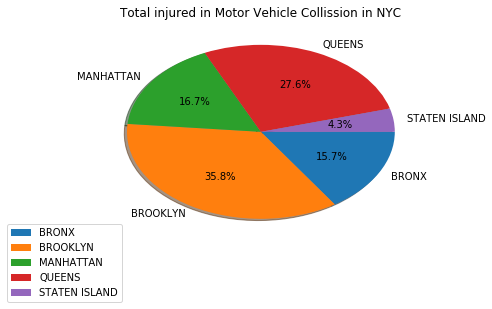

In [9]:
values = data27['Total_Injured']
labels = data27['BOROUGH']
plt.pie(values, labels=labels,
autopct='%1.1f%%',
counterclock=False, shadow=True)
plt.title('Total injured in Motor Vehicle Collission in NYC')
plt.legend(labels,loc=0,  bbox_to_anchor=(0.1, 0.1))
plt.show()